<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Chemical modelling: Concentration and activity
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we define the terms **concentration** and **activity**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

----
## Molarity and concentration

The **molarity** $[X_i]$ [mol/m$^3$] is defined as the ration between the amount of a
substance $n$ [mol] and the volume of the mixture $V$ [m$^3$]:
$$
[X_i] = \frac{n}{V}
$$

The molarity is the **concentration** of a substance in a (fluid) volume.

The concentration of a substance controls a chemical reaction. However, reactions in 
aqueous chemistry occur in the presence of **charged particles**. 
These charged particles have a significant influence on the
chemical reaction. 

----
## Activity
To account for this influence, the **activity** $(X_i)$ [-]
is introduced as a dimensionless quantity. It is related to concentration by
the dimensionless **activity coefficient** $\gamma_i$ [-]:
$$
(X_i) = \gamma_i \frac{[X_i]}{{[X_i]^{o}}}
$$

Here, $[X_i]^{o}$ is the concentration of the $i$-th substance at
standard conditions ($T=25^{\circ}$C, $p=1$ atm).

For very dilute solutions (only few charged species contained), the activity
coefficient is almost 1, and thus the activity is one, if the substance is
present under standard conditions. In other words, for very dilute solutions,
the activity reflects different temperature- and pressure conditions.

----
## Activity coefficients
The activity coefficient $\gamma_i$ [-] accounts
for the interaction of charged particles in a solution: 
- In a solution with no charged particles, no interaction occurs, and the activity under standard conditions is equal to1.
- In the presence of charged particles, attraction and repulsion of particles
occurs, depending on the charge. This electro-static interaction inhibits
the reactivity of the solution. Several model exist, which describe this
departure from an ideal solution.

### Debye-Hückel model
The Debye-Hückel model is based on the assumption that charged particles can
be treated as electrical charges.  Then the interaction of the charged particles
is given by Coulomb's law. For a solution with given ionic strength $I$ [mol/m$^3$], the
activity coefficient $\gamma_i$ for an ion is then given by
$$
\log \gamma_i = -A z_i^2 \sqrt{I}
$$
with $A$ [$\sqrt{\mathrm{m}^3/\mathrm{mol}}$] a parameter, and $I$ [mol/m$^3$]
the ionic strength.

The Debye-Hückel model is valid for an ionic strength
up to $I \sim 0.001$ mol/l.

### Extended Debye-Hückel model
For solutions with higher ionic strength,
an extension to the Debye-Hückel model has been proposed:
$$
 \log \gamma_i = -\frac{A z_i^2 \sqrt{I}}{1 + B a_i \sqrt{I}}
$$
with $A$ [$\sqrt{\mathrm{m}^3/\mathrm{mol}}$]
and $B$ [$\sqrt{\mathrm{m}^3/\mathrm{mol}}$/m]
two coefficients, and $a_i$ [m] the effective diameter of the ion.

The extended Debye-Hückel model is valid for an ionic strength
up to $I \sim 0.01$ mol/l.

----
## Ionic strength
The **ionic strength** $I$ [mol/m$^3$] is defined as
$$
 I = \frac{1}{2} \sum\limits_i [X_i] z_i^2
$$
Here, $[X_i]$ is the concentration of species $i$, and $z_i$ the electric
charge of species $i$. Thus the ionic strength measures the concentration
of charged particles in the solution.

In [2]:
def ion_debyehueckel(TC,IS):
    """
    ! function calculates activity coefficients for different ions
    ! following the extended Debye-Hueckel model
    ! NOTE for Ca2+, Mg2+, Na+, Cl- the bdot extended model is used
    !      bdot value from phreeqc
    ! input:
    !  TC               - temperature [C]
    !  IS               - ionic strength [mol / l]
    ! output
    !  activity['name'] - activity [-]
    !  version using density and dielectric constant
    !  written by Georg Kaufmann 03/01/2008
    """
    TK       = 273.16 + TC
    rho         = 1.0
    dielectric  = 87.72 - 0.39702 * TC + 0.00081784 * TC**2
    aa          = 1.82483e6 * np.sqrt(rho / (dielectric*TK)**3.)
    bb          = 50.2912e0 * np.sqrt(rho / (dielectric*TK))
    activity = {
    'Hp'    : 10.**(-aa*1.*np.sqrt(IS)/(1.+bb*9.0*np.sqrt(IS))),
    'Ca2p'  : 10.**(-aa*4.*np.sqrt(IS)/(1.+bb*5.0*np.sqrt(IS)) + 0.165*IS),
    'Mg2p'  : 10.**(-aa*4.*np.sqrt(IS)/(1.+bb*5.5*np.sqrt(IS)) + 0.200*IS),
    'OHm'   : 10.**(-aa*1.*np.sqrt(IS)/(1.+bb*3.5*np.sqrt(IS))),
    'HCO3m' : 10.**(-aa*1.*np.sqrt(IS)/(1.+bb*5.4*np.sqrt(IS))),
    'CO32m' : 10.**(-aa*4.*np.sqrt(IS)/(1.+bb*5.4*np.sqrt(IS))),
    'SO42m' : 10.**(-aa*4.*np.sqrt(IS)/(1.+bb*5.0*np.sqrt(IS))),
    'Nap'   : 10.**(-aa*1.*np.sqrt(IS)/(1.+bb*4.0*np.sqrt(IS)) + 0.04*IS),
    'Clm'   : 10.**(-aa*1.*np.sqrt(IS)/(1.+bb*3.0*np.sqrt(IS)) + 0.04*IS)
    }  
        
    return activity

In [4]:
TC = 20.
IS = 10e-4
activity = ion_debyehueckel(TC,IS)
print(activity['Hp'])

0.9667963012035621


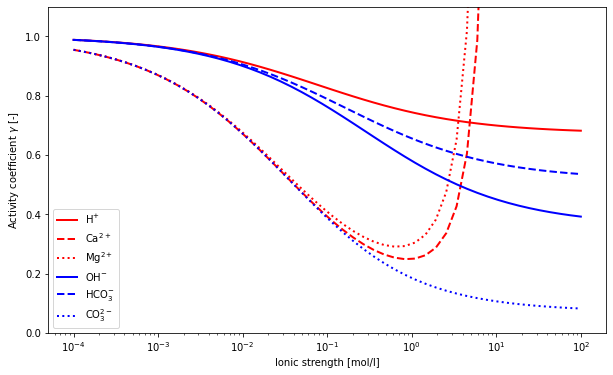

In [6]:
IS = np.logspace(-4,2,50)
TC = 20.
activity = ion_debyehueckel(TC,IS)

plt.figure(figsize=(10,6))
plt.xlabel('Ionic strength [mol/l]')
plt.ylabel('Activity coefficient $\gamma$ [-]')
plt.ylim([0,1.1])
plt.semilogx(IS,activity['Hp'],linewidth=2,color='red',linestyle='solid',label='H$^{+}$')
plt.semilogx(IS,activity['Ca2p'],linewidth=2,color='red',linestyle='dashed',label='Ca$^{2+}$')
plt.semilogx(IS,activity['Mg2p'],linewidth=2,color='red',linestyle='dotted',label='Mg$^{2+}$')

plt.semilogx(IS,activity['OHm'],linewidth=2,color='blue',linestyle='solid',label='OH$^{-}$')
plt.semilogx(IS,activity['HCO3m'],linewidth=2,color='blue',linestyle='dashed',label='HCO$_3^{-}$')
plt.semilogx(IS,activity['CO32m'],linewidth=2,color='blue',linestyle='dotted',label='CO$_3^{2-}$')
plt.legend()
plt.savefig('figures/CHEM_activity.png')

----